In [ ]:
pip install "snowflake-snowpark-python[pandas]"

### Importing necesaary packages (including Snowpark)

In [ ]:
import json
import pandas as pd
from snowflake.snowpark import functions as F
from snowflake.snowpark.functions import pandas_udf
from snowflake.snowpark.session import Session
from snowflake.snowpark.types import *
from snowflake.snowpark.version import VERSION

### Read credentials

In [ ]:
with open('cred.json') as f:
    connection_parameters = json.load(f)
session = Session.builder.configs(connection_parameters).create()

In [ ]:
snowpark_version = VERSION
print('Database                    : {}'.format(session.get_current_database()))
print('Schema                      : {}'.format(session.get_current_schema()))
print('Warehouse                   : {}'.format(session.get_current_warehouse()))
print('Role                        : {}'.format(session.get_current_role()))
print('Snowpark for Python version : {}.{}.{}'.format(snowpark_version[0],snowpark_version[1],snowpark_version[2]))

Database                    : "INSURANCE"
Schema                      : "PUBLIC"
Warehouse                   : "COMPUTE_WH"
Role                        : "ACCOUNTADMIN"
Snowpark for Python version : 1.8.0


### Data Loading

In [ ]:
weather = pd.read_csv("Weather.csv")
weather.head()

,Date,ZipCode,City,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH
0,01-01-2021,73301,Austin,54,76,52,49,41,26,53,67,41,29.521504,29.877489,29.257409,7,7,1,52,34
1,02-01-2021,73301,Austin,90,41,32,35,72,45,67,42,43,30.437999,29.987347,29.955162,6,7,2,37,31
2,03-01-2021,73301,Austin,78,89,31,43,68,32,61,64,28,29.665843,29.840357,29.910402,7,5,2,19,10
3,04-01-2021,73301,Austin,75,50,62,78,30,28,62,61,59,30.492328,29.524172,29.593171,7,7,2,24,47
4,05-01-2021,73301,Austin,74,84,61,66,45,45,41,69,32,30.236968,29.848523,29.765942,5,6,4,67,51


In [ ]:
finance = pd.read_csv("Financial.csv")
finance.head()

,CustomerID,FirstName,LastName,SSN,DateOfBirth,Address,ZipCode,City,AccountType,AccountBalance,...,CarOwnership,CarBrand,CarValue,CarYear,NumberOfAccounts,OpenCreditLines,TotalDebt,DebtToIncomeRatio,ClaimDate,TimesClaimed
0,1,Alexandra,Morgan,173-96-9489,2001-03-08,"54309 Williams Lakes, Austin, 73301",73301,Austin,Savings,28352.202270,...,Own,Honda,23086.561753,2019,1,3,0.0,0.0,2022-07-09,2
1,2,Wanda,Spears,705-90-1515,1976-09-14,"831 Carla Ville, Austin, 73301",73301,Austin,Checking,27560.885723,...,No,NaN,NaN,2003,5,3,0.0,0.0,2022-09-02,2
2,3,Katherine,Webb,270-26-4123,1972-02-20,"41685 Acevedo Grove, Austin, 73301",73301,Austin,Savings,8922.238773,...,No,NaN,NaN,2004,3,2,0.0,0.0,2020-12-12,2
3,4,Kevin,Cohen,569-48-7111,1964-01-22,"29096 Soto Lodge, Austin, 73301",73301,Austin,Checking,11562.169183,...,Rent,Chevrolet,NaN,2005,5,4,0.0,0.0,2020-09-05,1
4,5,Fernando,Young,317-77-0378,1973-12-15,"597 Gonzalez Mountains, Austin, 73301",73301,Austin,Checking,26654.259462,...,No,NaN,NaN,2022,4,4,0.0,0.0,NaN,0


### Create a Snowpark DF from the pandas DF

In [ ]:
df = session.createDataFrame(weather)
cf = session.createDataFrame(finance)

### Loading weather data from Snowpark DF to a Snowflake internal table

In [ ]:
df.write.mode("overwrite").saveAsTable("weather")
session.table('weather').limit(3).show(5)

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"Date"      |"ZipCode"  |"City"  |"TempHighF"  |"TempAvgF"  |"TempLowF"  |"DewPointHighF"  |"DewPointAvgF"  |"DewPointLowF"  |"HumidityHighPercent"  |"HumidityAvgPercent"  |"HumidityLowPercent"  |"SeaLevelPressureHighInches"  |"SeaLevelPressureAvgInches"  |"SeaLevelPressureLowInches"  |"VisibilityHighMiles"  |"VisibilityAvgMiles"  |"VisibilityLowMiles"  |"WindHighMPH"  |"WindAvgMPH"  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Create a pandas data frame from the Snowflake table

In [ ]:
df = session.table('weather').toPandas()

In [ ]:
df.head()

,Date,ZipCode,City,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH
0,01-01-2021,73301,Austin,54,76,52,49,41,26,53,67,41,29.521504,29.877489,29.257409,7,7,1,52,34
1,02-01-2021,73301,Austin,90,41,32,35,72,45,67,42,43,30.437999,29.987347,29.955162,6,7,2,37,31
2,03-01-2021,73301,Austin,78,89,31,43,68,32,61,64,28,29.665843,29.840357,29.910402,7,5,2,19,10
3,04-01-2021,73301,Austin,75,50,62,78,30,28,62,61,59,30.492328,29.524172,29.593171,7,7,2,24,47
4,05-01-2021,73301,Austin,74,84,61,66,45,45,41,69,32,30.236968,29.848523,29.765942,5,6,4,67,51


### Loading financial data from Snowpark DF to a Snowflake internal table

In [ ]:
cf.write.mode("overwrite").saveAsTable("finance")
session.table('finance').limit(3).show(5)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"CustomerID"  |"FirstName"  |"LastName"  |"SSN"        |"DateOfBirth"  |"Address"                            |"ZipCode"  |"City"  |"AccountType"  |"AccountBalance"    |"CreditScore"  |"Income"           |"LoanAmount"        |"LoanStatus"  |"EmploymentStatus"  |"Education"  |"MaritalStatus"  |"Kids"  |"KidsAge"  |"InsuranceOptedDate"  |"InsuranceAmount"   |"ClaimedAm

### Create a pandas data frame from the Snowflake table

In [ ]:
cf = session.table('finance').toPandas()

In [ ]:
cf.head()

,CustomerID,FirstName,LastName,SSN,DateOfBirth,Address,ZipCode,City,AccountType,AccountBalance,...,CarOwnership,CarBrand,CarValue,CarYear,NumberOfAccounts,OpenCreditLines,TotalDebt,DebtToIncomeRatio,ClaimDate,TimesClaimed
0,1,Alexandra,Morgan,173-96-9489,2001-03-08,"54309 Williams Lakes, Austin, 73301",73301,Austin,Savings,28352.202270,...,Own,Honda,23086.561753,2019,1,3,0.0,0.0,2022-07-09,2
1,2,Wanda,Spears,705-90-1515,1976-09-14,"831 Carla Ville, Austin, 73301",73301,Austin,Checking,27560.885723,...,No,None,NaN,2003,5,3,0.0,0.0,2022-09-02,2
2,3,Katherine,Webb,270-26-4123,1972-02-20,"41685 Acevedo Grove, Austin, 73301",73301,Austin,Savings,8922.238773,...,No,None,NaN,2004,3,2,0.0,0.0,2020-12-12,2
3,4,Kevin,Cohen,569-48-7111,1964-01-22,"29096 Soto Lodge, Austin, 73301",73301,Austin,Checking,11562.169183,...,Rent,Chevrolet,NaN,2005,5,4,0.0,0.0,2020-09-05,1
4,5,Fernando,Young,317-77-0378,1973-12-15,"597 Gonzalez Mountains, Austin, 73301",73301,Austin,Checking,26654.259462,...,No,None,NaN,2022,4,4,0.0,0.0,None,0


**FINANCIAL DATASET INFO**

In [ ]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          8700 non-null   int16  
 1   FirstName           8700 non-null   object 
 2   LastName            8700 non-null   object 
 3   SSN                 8700 non-null   object 
 4   DateOfBirth         8700 non-null   object 
 5   Address             8700 non-null   object 
 6   ZipCode             8700 non-null   int32  
 7   City                8700 non-null   object 
 8   AccountType         8700 non-null   object 
 9   AccountBalance      8700 non-null   float64
 10  CreditScore         8700 non-null   int16  
 11  Income              8700 non-null   float64
 12  LoanAmount          8700 non-null   float64
 13  LoanStatus          8700 non-null   object 
 14  EmploymentStatus    8700 non-null   object 
 15  Education           8700 non-null   object 
 16  Marita

**WEATHER DATASET INFO**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84651 entries, 0 to 84650
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        84651 non-null  object 
 1   ZipCode                     84651 non-null  int32  
 2   City                        84651 non-null  object 
 3   TempHighF                   84651 non-null  int8   
 4   TempAvgF                    84651 non-null  int8   
 5   TempLowF                    84651 non-null  int8   
 6   DewPointHighF               84651 non-null  int8   
 7   DewPointAvgF                84651 non-null  int8   
 8   DewPointLowF                84651 non-null  int8   
 9   HumidityHighPercent         84651 non-null  int8   
 10  HumidityAvgPercent          84651 non-null  int8   
 11  HumidityLowPercent          84651 non-null  int8   
 12  SeaLevelPressureHighInches  84651 non-null  float64
 13  SeaLevelPressureAvgInches   846

**VISUALIZING HISTORICAL WINDSPEED DATA AS ZIPCODE WISE**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your data into a DataFrame (replace 'your_data.csv' with your data file)
# Example: df = pd.read_csv('your_data.csv')
# Convert 'Date' column to datetime format

# Define your DataFrame 'df'

# Convert wind speed columns to numeric
df['WindHighMPH'] = pd.to_numeric(df['WindHighMPH'], errors='coerce')
df['WindAvgMPH'] = pd.to_numeric(df['WindAvgMPH'], errors='coerce')

# Find the unique Zip codes
unique_Zip_codes = df['ZipCode'].unique()

# Create a Zip code input widget
zip_input = widgets.IntText(description='Enter Zip code:')

# Create a dropdown widget for data selection
winds_selector = widgets.Dropdown(options=['Total Data', 'First 8 Months of 2023', 'August 2023'],
                                  description='Select Data:')

# Create a "Plot" button
plot_button = widgets.Button(description='Plot')

# Create an output widget for displaying plots
output = widgets.Output()

# Function to update and display the plot
def update_plot(change):
    with output:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        Zip_code = zip_input.value
        if Zip_code not in unique_Zip_codes:
            print(f"Invalid Zip code: {Zip_code}")
        else:
            data_filtered = df[df['ZipCode'] == Zip_code].copy()
            data_filtered.sort_values(by='Date', inplace=True)

            selected_data = winds_selector.value
            if selected_data == 'Total Data':
                plt.plot(data_filtered['Date'], data_filtered['WindHighMPH'], label='Wind High MPH')
                plt.plot(data_filtered['Date'], data_filtered['WindAvgMPH'], label='Wind Avg MPH')
            elif selected_data == 'First 8 Months of 2023':
                filtered_data = data_filtered[data_filtered['Date'].dt.year == 2023]
                filtered_data = filtered_data[(filtered_data['Date'].dt.month >= 1) & (filtered_data['Date'].dt.month <= 8)]
                plt.plot(filtered_data['Date'], filtered_data['WindHighMPH'], label='Wind High MPH')
                plt.plot(filtered_data['Date'], filtered_data['WindAvgMPH'], label='Wind Avg MPH')
            elif selected_data == 'August 2023':
                filtered_data = data_filtered[(data_filtered['Date'] >= '2023-08-01') & (data_filtered['Date'] <= '2023-08-31')]
                plt.plot(filtered_data['Date'], filtered_data['WindHighMPH'], label='Wind High MPH')
                plt.plot(filtered_data['Date'], filtered_data['WindAvgMPH'], label='Wind Avg MPH')

            plt.xlabel('Date')
            plt.ylabel('Wind Speed (MPH)')
            plt.title(f'Wind Speed - {selected_data} for Zip Code {Zip_code}')
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Function to handle the "Plot" button click event
def on_plot_button_click(b):
    update_plot(None)

# Attach the update_plot function to the Zip code input widget's change event
zip_input.observe(update_plot, names='value')

# Attach the on_plot_button_click function to the "Plot" button
plot_button.on_click(on_plot_button_click)

# Display the widgets
display(zip_input)
display(winds_selector)
display(plot_button)
display(output)


IntText(value=0, description='Enter Zip code:')

Dropdown(description='Select Data:', options=('Total Data', 'First 8 Months of 2023', 'August 2023'), value='T…

Button(description='Plot', style=ButtonStyle())

Output()

**VISUALIZING AT WHICH DAY HURRICANE HAS HAPPENED AT PARICULAR ZIPCODE**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load your data into a DataFrame (replace 'your_data.csv' with your data file)
# Example: df = pd.read_csv('your_data.csv')
# Convert 'Date' column to datetime format

# Define your DataFrame 'df'

# Create a Zip code input widget
zip_input = widgets.IntText(description='Enter Zip code:')

# Create a start date input widget
start_date_input = widgets.DatePicker(description='Start Date:', value=None)

# Create an end date input widget
end_date_input = widgets.DatePicker(description='End Date:', value=None)

# Create a "Plot" button
plot_button = widgets.Button(description='Plot')

# Create an output widget for displaying plots and messages
output = widgets.Output()

# Function to update and display the plot
def update_plot(change):
    with output:
        clear_output(wait=True)
        Zip_code = zip_input.value
        start_date = pd.Timestamp(start_date_input.value)
        end_date = pd.Timestamp(end_date_input.value)

        # Check if Zip code is valid
        if Zip_code not in df['ZipCode'].unique():
            print(f"Invalid Zip code: {Zip_code}")
            return

        # Filter data by Zip code
        data_filtered = df[df['ZipCode'] == Zip_code].copy()

        if start_date is not None and end_date is not None:
            # Filter data by date range
            data_filtered = data_filtered[(data_filtered['Date'] >= start_date) & (data_filtered['Date'] <= end_date)]

            # Check if data is available for the selected date range
            if data_filtered.empty:
                print("Data not available for the selected date range.")
                return

            # Print data values date-wise
            print(f"Wind Speed for Zip Code {Zip_code} {start_date} {end_date}:")
            print("=" * 30)
            for index, row in data_filtered.iterrows():
                print(f"Date: {row['Date']}, Wind: {row['WindHighMPH']} mph")

            # Plot data for the selected date range
            plt.figure(figsize=(10, 6))
            plt.scatter(data_filtered['Date'], data_filtered['WindHighMPH'], color='red', marker='o', label='Wind speed')
            plt.axhline(y=80, color='red', linestyle='--', label='Wind Threshold')
            plt.xlabel('Date')
            plt.ylabel('Wind Speed (MPH)')
            #plt.title(f'Wind Speed for Zip Code {Zip_code} (Selected Date Range)')
            plt.title(f'Wind Speed for Zip Code {Zip_code} {start_date} {end_date}')

            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Function to handle the "Plot" button click event
def on_plot_button_click(b):
    update_plot(None)

# Attach the on_plot_button_click function to the "Plot" button
plot_button.on_click(on_plot_button_click)

# Display the widgets
display(zip_input)
display(start_date_input)
display(end_date_input)
display(plot_button)
display(output)


IntText(value=0, description='Enter Zip code:')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

Button(description='Plot', style=ButtonStyle())

Output()

**WEATHER FORECASTING ZIP CODE WISE USING LSTM**

Enter a Zip code: 75099
Enter start date for future forecasting (YYYY-MM-DD): 2023-09-16
Enter end date for future forecasting (YYYY-MM-DD): 2023-09-20
Enter the number of historical data points to display on the plot: 152
Epoch 1/100
30/30 [==============================] - 3s 8ms/step - loss: 0.1488
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0686
Epoch 3/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0668
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 0.0649
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0634
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0618
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0604
Epoch 8/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0591
Epoch 9/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0579
Epoch 10/100
30/30 [==============================] - 

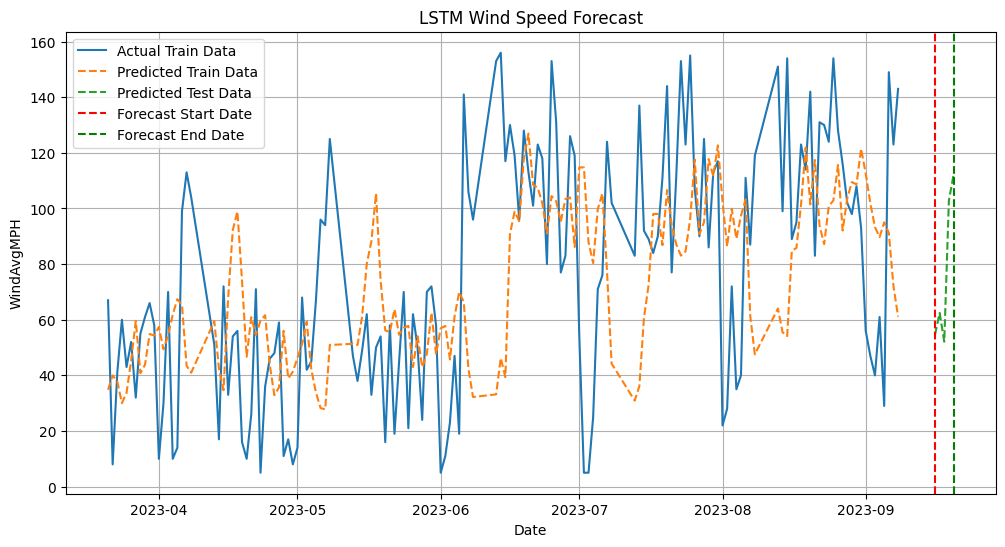

Risk Level: green
Exiting the program.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Find the unique Zip codes
unique_Zip_codes = df['ZipCode'].unique()

# Get user input for Zip code
Zip_code_input = input("Enter a Zip code: ")

Zip_code = int(Zip_code_input)

if Zip_code not in unique_Zip_codes:
    print(f"Invalid Zip code: {Zip_code}")
else:
    # Filter data for the specified Zip code
    data_filtered = df[df['ZipCode'] == Zip_code].copy()

    # Sort data by date
    data_filtered.sort_values(by='Date', inplace=True)

    # User input for LSTM forecasting
    start_date_input = input("Enter start date for future forecasting (YYYY-MM-DD): ")
    end_date_input = input("Enter end date for future forecasting (YYYY-MM-DD): ")
    plot_interval_input = int(input("Enter the number of historical data points to display on the plot: "))

    try:
        start_date = datetime.strptime(start_date_input, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_input, '%Y-%m-%d')

        if start_date < end_date:
            # Filter data before the start date for training
            data_filtered_train = data_filtered[data_filtered['Date'] < start_date].copy()

            # Fill missing values in 'WindAvgMPH' with the mean of that column for training data
            data_filtered_train['WindAvgMPH'].fillna(data_filtered_train['WindAvgMPH'].mean(), inplace=True)

            # Check if there are any remaining NaN values for training data
            if data_filtered_train['WindAvgMPH'].isna().any():
                print("Warning: There are still NaN values in the 'WindAvgMPH' column for training data after filling.")

            # Generate date range for forecasts
            forecast_dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

            # Prepare the data for LSTM
            data_lstm = data_filtered_train[['Date', 'WindAvgMPH']]
            data_lstm.set_index('Date', inplace=True)
            values = data_lstm.values.astype('float32')

            # Normalize the data
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_values = scaler.fit_transform(values)

            # Define a function to create sequences of data
            def create_sequences(dataset, look_back=1):
                X, y = [], []
                for i in range(len(dataset) - look_back):
                    X.append(dataset[i:(i + look_back), 0])
                    y.append(dataset[i + look_back, 0])
                return np.array(X), np.array(y)

            # Create sequences of data with a specified look-back period
            look_back = 7  # You can adjust this window size
            X, y = create_sequences(scaled_values, look_back)

            # Split the data into training and testing sets
            train_size = len(X) - len(forecast_dates)
            X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

            # Reshape input to be [samples, time steps, features]
            X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

            # Build the LSTM model
            lstm_model = Sequential()
            lstm_model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
            lstm_model.add(Dense(1))
            lstm_model.compile(loss='mean_squared_error', optimizer='adam')

            # Train the LSTM model
            lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

            # Make predictions with LSTM
            lstm_train_predictions = lstm_model.predict(X_train)
            lstm_test_predictions = lstm_model.predict(X_test)

            # Inverse transform the predictions to get the actual values
            lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)
            lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)

            # Calculate RMSE for LSTM
            lstm_train_rmse = np.sqrt(mean_squared_error(y_train, lstm_train_predictions))
            lstm_test_rmse = np.sqrt(mean_squared_error(y_test, lstm_test_predictions))

            print(f"LSTM Train RMSE: {lstm_train_rmse:.2f}")
            print(f"LSTM Test RMSE: {lstm_test_rmse:.2f}")
            # Print forecasted values
            print("Forecasted Values:")
            print("Date\t\t\tForecasted WindAvgMPH")
            for date, forecast in zip(forecast_dates, lstm_test_predictions):
                print(f"{date}\t{forecast[0]:.2f}")

            # Create date ranges for plotting
            historical_dates = data_filtered_train['Date'][-plot_interval_input:]

            forecast_start_date = forecast_dates[0]
            forecast_end_date = forecast_dates[-1]

            # Create arrays for plotting
            historical_actual = data_filtered_train['WindAvgMPH'][-plot_interval_input:]

            historical_predicted = lstm_train_predictions[-plot_interval_input:]
            forecasted_dates = forecast_dates
            forecasted_predicted = lstm_test_predictions

            # Plot the data
            plt.figure(figsize=(12, 6))
            plt.plot(historical_dates, historical_actual, label='Actual Train Data')
            plt.plot(historical_dates, historical_predicted, label='Predicted Train Data', linestyle='dashed')
            plt.plot(forecasted_dates, forecasted_predicted, label='Predicted Test Data', linestyle='dashed')
            plt.axvline(x=forecast_start_date, color='r', linestyle='--', label='Forecast Start Date')
            plt.axvline(x=forecast_end_date, color='g', linestyle='--', label='Forecast End Date')
            plt.xlabel("Date")
            plt.ylabel("WindAvgMPH")
            plt.title("LSTM Wind Speed Forecast")
            plt.legend()
            plt.grid(True)
            plt.show()

                        # Calculate the risk level for the LSTM test predictions
            def calculate_risk_level(predictions):
                # Calculate the number of predictions above 120
                above_120_count = sum(1 for prediction in predictions if prediction > 120)

                # Calculate the total number of predictions
                total_count = len(predictions)

                # Calculate the percentage of predictions above 120
                percentage_above_120 = (above_120_count / total_count) * 100

                if percentage_above_120 >= 30:
                    return "red"
                elif 110 <= percentage_above_120 < 120:
                    return "yellow"
                else:
                    return "green"

            risklevel = calculate_risk_level(lstm_test_predictions)
            print(f"Risk Level: {risklevel}")

        else:
            print("Invalid date range for future forecasting. Start date must be before end date.")

    except ValueError:
        print("Invalid date format. Please enter dates in YYYY-MM-DD format.")

print("Exiting the program.")


**HOUSE PREMIUM CALCULATOR INTEGRATED WITH WEATHER FORECASTING MODEL,WHICH CALCULATES UPDATED HOUSE PREMIUM AFTER COMPARING ALL RISKSCORES**

In [ ]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta

# Load your financial data frame


# Get user input for SSN
ssn_input = input("Enter SSN: ")

# Check if SSN is valid in the financial dataset
if ssn_input in cf['SSN'].values:
    # Retrieve the corresponding zip code
    valid_ssn_row = cf[cf['SSN'] == ssn_input]
    zip_code = valid_ssn_row['ZipCode'].values[0]

    # Load the weather dataset


    # Filter data for the specified Zip code
    data_filtered = df[df['ZipCode'] == zip_code].copy()

    # Convert the 'Date' column to datetime format
    data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])

    # Sort data by date
    data_filtered.sort_values(by='Date', inplace=True)

    # User input for LSTM forecasting
    start_date_input = input("Enter start date for future forecasting (YYYY-MM-DD): ")
    end_date_input = input("Enter end date for future forecasting (YYYY-MM-DD): ")

    try:
        start_date = datetime.strptime(start_date_input, '%Y-%m-%d')
        end_date = datetime.strptime(end_date_input, '%Y-%m-%d')

        if start_date < end_date:
            # Filter data before the start date for training
            data_filtered_train = data_filtered[data_filtered['Date'] < start_date].copy()

            # Fill missing values in 'WindAvgMPH' with the mean of that column for training data
            data_filtered_train['WindAvgMPH'].fillna(data_filtered_train['WindAvgMPH'].mean(), inplace=True)

            # Check if there are any remaining NaN values for training data
            if data_filtered_train['WindAvgMPH'].isna().any():
                print("Warning: There are still NaN values in the 'WindAvgMPH' column for training data after filling.")

            # Generate date range for forecasts
            forecast_dates = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

            # Prepare the data for LSTM
            data_lstm = data_filtered_train[['Date', 'WindAvgMPH']]
            data_lstm.set_index('Date', inplace=True)
            values = data_lstm.values.astype('float32')

            # Normalize the data
            scaler = MinMaxScaler(feature_range=(0, 1))
            scaled_values = scaler.fit_transform(values)

            # Define a function to create sequences of data
            def create_sequences(dataset, look_back=1):
                X, y = [], []
                for i in range(len(dataset) - look_back):
                    X.append(dataset[i:(i + look_back), 0])
                    y.append(dataset[i + look_back, 0])
                return np.array(X), np.array(y)

            # Create sequences of data with a specified look-back period
            look_back = 7  #  window size
            X, y = create_sequences(scaled_values, look_back)

            # Split the data into training and testing sets
            train_size = len(X) - len(forecast_dates)
            X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

            # Reshape input to be [samples, time steps, features]
            X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

            # Build the LSTM model
            lstm_model = Sequential()
            lstm_model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
            lstm_model.add(Dense(1))
            lstm_model.compile(loss='mean_squared_error', optimizer='adam')

            # Train the LSTM model
            lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

            # Make predictions with LSTM
            lstm_train_predictions = lstm_model.predict(X_train)
            lstm_test_predictions = lstm_model.predict(X_test)

            # Inverse transform the predictions to get the actual values
            lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)
            lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)

            # Calculate the risk level for the LSTM test predictions
            def calculate_risk_level(predictions):
                # Calculate the number of predictions above 120
                above_120_count = sum(1 for prediction in predictions if prediction > 120)

                # Calculate the total number of predictions
                total_count = len(predictions)

                # Calculate the percentage of predictions above 120
                percentage_above_120 = (above_120_count / total_count) * 100

                if percentage_above_120 >= 30:
                    risklevel = "HIGH"
                elif 110 <= percentage_above_120 < 120:
                    risklevel = "MODERATE"
                else:
                    risklevel = "LOW"

                return risklevel

            risklevel = calculate_risk_level(lstm_test_predictions)

            # Extract relevant columns for analysis
            selected_columns = ['SSN', 'Income', 'MaritalStatus', 'Kids', 'ZipCode']
            data = cf[selected_columns].copy()

            # Calculate expenses based on marital status and number of kids
            average_expenses_per_person = 800  # Adjust this value as needed

            def calculate_expenses(row):
                marital_status = row['MaritalStatus']
                kids = row['Kids']
                if marital_status == 'Married':
                    expenses = average_expenses_per_person * (1 + kids)
                else:
                    expenses = average_expenses_per_person * (2 + kids)
                return expenses

            data['Expenses'] = data.apply(calculate_expenses, axis=1)

            # Calculate available income after deducting expenses from income
            data['Available_Income'] = data['Income'] - data['Expenses']

            # Extract relevant columns for profile score analysis
            selected_columns_profile = ['SSN', 'ClaimedAmount', 'ClaimDate']
            profile_data = cf[selected_columns_profile].copy()

            # Convert 'ClaimedAmount' to string format (if it's not already)
            profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].astype(str)

            # Remove dollar signs and commas
            profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].str.replace('[$,]', '')

            # Convert 'ClaimedAmount' column to numeric
            profile_data['ClaimedAmount'] = pd.to_numeric(profile_data['ClaimedAmount'], errors='coerce')

            # Filter the data to calculate 'Claim Count'
            claim_count_data = profile_data.groupby('SSN')['ClaimDate'].count().reset_index()
            claim_count_data.columns = ['SSN', 'Claim Count']

            def calculate_profile_score(claim_count):
                if claim_count == 0:
                    return 'LOW'
                elif claim_count == 1:
                    return 'MODERATE'
                else:
                    return 'HIGH'

            claim_count_data['Profile_Score'] = claim_count_data['Claim Count'].apply(calculate_profile_score)

            # Create input widgets for premium calculation
            ssn_input_premium = widgets.Text(
                description='Enter SSN for Premium Calculation:'
            )

            insurance_amount_input = widgets.FloatText(
                description='Insurance Amount:'
            )

            # Define labels for displaying results
            zip_code_label = widgets.Label(value='')
            premium_output = widgets.Label(value='')

            # Update SSN input for premium calculation with the one used in forecasting
            ssn_input_premium.value = ssn_input

            # Function to update the Zip Code label based on SSN input
            def update_zip_code_label(_):
                candidate_id = ssn_input_premium.value

                # Remove hyphens and whitespace from the input SSN
                candidate_id = ''.join(candidate_id.split())

                # Check if the candidate_id (SSN) is valid
                candidate_row = data[data['SSN'] == candidate_id]
                if not candidate_row.empty:
                    zip_code = candidate_row.iloc[0]['ZipCode']
                    zip_code_label.value = f'Zip Code: {zip_code}'
                else:
                    zip_code_label.value = f'Candidate ID {candidate_id} not found.'

            # Function to calculate premium based on risk factors
            def calculate_premium(candidate_id, insurance_amount):
                candidate_row_profile = claim_count_data[claim_count_data['SSN'] == candidate_id]

                if not candidate_row_profile.empty:
                    profile_score = candidate_row_profile.iloc[0]['Profile_Score']

                    # Calculate affordability and financial asset strength
                    candidate_row_afford = data[data['SSN'] == candidate_id]

                    if not candidate_row_afford.empty:
                        available_income = candidate_row_afford.iloc[0]['Available_Income']

                        if available_income >= insurance_amount:
                            affordability = 'LOW'
                        else:
                            affordability = 'HIGH'
                    else:
                        affordability = 'Data Not Found'

                    # Calculate asset strength based on home value
                    home_value = 0

                    if home_value >= 300000:
                        HouseValue_strength = 'LOW'
                    elif home_value >= 150000:
                        HouseValue_strength = 'MODERATE'
                    else:
                        HouseValue_strength = 'HIGH'

                    risk_scores = {
                        'LOW': 4,
                        'MODERATE': 2,
                        'HIGH': 1
                    }

                    weather_score = risk_scores.get(risklevel, 0)
                    profile_score_score = risk_scores.get(profile_score, 0)
                    affordability_score = risk_scores.get(affordability, 0)
                    HouseValue_strength_score = risk_scores.get(HouseValue_strength, 0)

                    total_score = weather_score + profile_score_score + affordability_score + HouseValue_strength_score

                    if total_score == 12:
                        premium = insurance_amount
                    elif 5 <= total_score < 12:
                        premium = insurance_amount * 1.45  # Increase by 45%
                    else:
                        premium = insurance_amount * 2.20  # Increase by 120%

                    return premium, profile_score, risklevel, affordability, HouseValue_strength
                else:
                    return None, None, None, None, None

            # Create a button to trigger premium calculation
            calculate_button = widgets.Button(description='Calculate Updated Premium')

            # Function to calculate the premium when the button is clicked
            def calculate_premium_button_click(change):
                candidate_id = ssn_input_premium.value
                insurance_amount = insurance_amount_input.value

                premium, profile_score, risklevel, affordability, HouseValue_strength = calculate_premium(candidate_id, insurance_amount)

                if premium is not None:
                    premium_output.value = f"Updated Premium: {premium}\n  Profile Score: {profile_score}\n Weather Risk Level: {risklevel}\n  Affordability: {affordability}\n  HouseValue Strength: {HouseValue_strength}"
                else:
                    premium_output.value = f'Candidate ID {candidate_id} not found for profile score.'

            # Set the function to be called when the button is clicked
            calculate_button.on_click(calculate_premium_button_click)

            # Display widgets for premium calculation
            display(widgets.Label(value='HOUSE INSURANCE PREMIUM CALCULATOR'))
            display(ssn_input_premium)
            display(zip_code_label)
            display(insurance_amount_input)
            display(calculate_button)
            display(premium_output)

    except ValueError:
        print("Invalid date format or input. Please use the format YYYY-MM-DD.")
else:
    print("Invalid SSN. Please enter a valid SSN from the financial dataset.")


Enter SSN: 270-26-4123
Enter start date for future forecasting (YYYY-MM-DD): 2023-09-16
Enter end date for future forecasting (YYYY-MM-DD): 2023-09-20
Epoch 1/100
30/30 [==============================] - 3s 6ms/step - loss: 0.1225
Epoch 2/100
30/30 [==============================] - 0s 10ms/step - loss: 0.0663
Epoch 3/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0639
Epoch 4/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0624
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.0610
Epoch 6/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0596
Epoch 7/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0588
Epoch 8/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0577
Epoch 9/100
30/30 [==============================] - 1s 16ms/step - loss: 0.0564
Epoch 10/100
30/30 [==============================] - 1s 16ms/step - loss: 0.0554
Epoch 11/100
30/30 [===================

<ipython-input-63-82750d0d2130>:153: FutureWarning: The default value of regex will change from True to False in a future version.
  profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].str.replace('[$,]', '')


Label(value='HOUSE INSURANCE PREMIUM CALCULATOR')

Text(value='270-26-4123', description='Enter SSN for Premium Calculation:')

Label(value='')

FloatText(value=0.0, description='Insurance Amount:')

Button(description='Calculate Updated Premium', style=ButtonStyle())

Label(value='')

**ADVANCED MODEL WHICH WILL BE FURTHER INTEGRATED WITH 2 DIFFERENT TYPES OF PREDICTIVE MODEL ONE FOR WEATHER FORECASTING AND ANOTHER FOR ZIP CODE ANALYSIS,ADDITION TO THIS IT HAS INTEGRATION OF THREE DIFFERENT TYPE OF DASHBOARD WORKING TOGETHER ALSO THE THE FEATURE OF SHARING INFORMATION TO ALL DASHBOARD EXTRACTING FROM DIFFERENT DATASETS WHEN TRIGGGER BUTTON IS CLICKED GIVES A EXTRA PROTECTION AND VALIDATION THAT AFTER THE PREDICTIVE MODEL PASS THEIR FORECASTED RESULT ,IN LATER STAGES IN RISKSCORING OR IN UPATED PREMIUM PRICING STAGE  CHANGE IN SSN ID AND ZIPCODE WILL NOT BE ALLOWED**

In [ ]:

import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load your financial data frame

# Extract relevant columns for analysis
selected_columns = ['SSN', 'Income', 'MaritalStatus', 'Kids', 'ZipCode']
data = cf[selected_columns].copy()

# Calculate expenses based on marital status and number of kids
average_expenses_per_person = 800  # Adjust this value as needed

def calculate_expenses(row):
    marital_status = row['MaritalStatus']
    kids = row['Kids']
    if marital_status == 'Married':
        expenses = average_expenses_per_person * (1 + kids)
    else:
        expenses = average_expenses_per_person * (2 + kids)
    return expenses

data['Expenses'] = data.apply(calculate_expenses, axis=1)

# Calculate available income after deducting expenses from income
data['Available_Income'] = data['Income'] - data['Expenses']

# Extract relevant columns for profile score analysis
selected_columns_profile = ['SSN', 'ClaimedAmount', 'ClaimDate']
profile_data = cf[selected_columns_profile].copy()

# Convert 'ClaimedAmount' to string format (if it's not already)
profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].astype(str)

# Remove dollar signs and commas
profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].str.replace('[$,]', '')

# Convert 'ClaimedAmount' column to numeric
profile_data['ClaimedAmount'] = pd.to_numeric(profile_data['ClaimedAmount'], errors='coerce')

# Filter the data to calculate 'Claim Count'
claim_count_data = profile_data.groupby('SSN')['ClaimDate'].count().reset_index()
claim_count_data.columns = ['SSN', 'Claim Count']

# Calculate profile score based on claim frequency
def calculate_profile_score(row):
    claim_freq = row['Claim Count']
    if claim_freq == 0:
        return 'GREEN'
    elif claim_freq == 1:
        return 'YELLOW'
    else:
        return 'RED'

claim_count_data['Profile_Score'] = claim_count_data.apply(calculate_profile_score, axis=1)

# Extract relevant columns for information display
selected_columns_info = ['SSN', 'HomeValue']
info_data = cf[selected_columns_info].copy()

# Convert 'HomeValue' to string format (if it's not already)
info_data['HomeValue'] = info_data['HomeValue'].astype(str)

# Remove dollar signs and commas
info_data['HomeValue'] = info_data['HomeValue'].str.replace('[$,]', '')

# Convert 'HomeValue' column to numeric
info_data['HomeValue'] = pd.to_numeric(info_data['HomeValue'], errors='coerce')

# Define input widget for SSN
ssn_input = widgets.Text(
    description='Enter SSN:'
)

# Define labels for displaying results
zip_code_label = widgets.Label(value='')
candidate_affordability_label = widgets.Label(value='')
profile_score_label = widgets.Label(value='')
HouseValue_strength_label = widgets.Label(value='')  # Add a label for financial asset strength
info_label = widgets.Label(value='')

# Define an input widget for insurance amount
insurance_input = widgets.FloatText(
    description='House Insurance Amount:'
)

# Initialize shared_zip_code and shared_ssn as empty strings
shared_zip_code = ''
shared_ssn = ''

# Function to update the Zip Code label based on SSN input and store it in the shared variable
def update_zip_code_label(_):
    global shared_zip_code  # Use the global variable
    candidate_id = ssn_input.value

    # Remove hyphens and whitespace from the input SSN
    candidate_id = ''.join(candidate_id.split())

    # Check if the candidate_id (SSN) is valid
    candidate_row = data[data['SSN'] == candidate_id]
    if not candidate_row.empty:
        zip_code = candidate_row.iloc[0]['ZipCode']
        zip_code_label.value = f'Zip Code: {zip_code}'
        # Store the Zip Code in the shared variable as a string
        shared_zip_code = str(zip_code)
        # Store the SSN in the shared variable as a string
        shared_ssn = str(candidate_id)
    else:
        zip_code_label.value = f'Candidate ID {candidate_id} not found.'

# Function to check all features for the given SSN and pass the Zip Code to the Zip Code Analysis Dashboard
def check_all_features(_):
    global shared_zip_code, shared_ssn  # Use the global variables
    candidate_id = ssn_input.value

    # Remove hyphens and whitespace from the input SSN
    candidate_id = ''.join(candidate_id.split())

    # Check Affordability
    candidate_row_afford = data[data['SSN'] == candidate_id]
    if not candidate_row_afford.empty:
        insurance_amount = insurance_input.value
        can_afford = candidate_row_afford.iloc[0]['Available_Income'] >= insurance_amount
        candidate_affordability_label.value = f'Affordability: {"GREEN" if can_afford else "RED"}'
    else:
        candidate_affordability_label.value = f'Candidate ID {candidate_id} not found for affordability'

    # Check Profile Score
    candidate_row_profile = claim_count_data[claim_count_data['SSN'] == candidate_id]
    if not candidate_row_profile.empty:
        profile_score = candidate_row_profile.iloc[0]['Profile_Score']
        profile_score_label.value = f'Profile Score: {profile_score}'
    else:
        profile_score_label.value = f'Candidate ID {candidate_id} not found for profile score'

    # Check Financial Asset Strength (based on HomeValue)
    candidate_row_info = info_data[info_data['SSN'] == candidate_id]
    if not candidate_row_info.empty:
        home_value = candidate_row_info.iloc[0]['HomeValue']
        if home_value >= 300000:  # Adjust the threshold as needed
            HouseValue_strength = 'GREEN'
        elif home_value >= 150000:
            HouseValue_strength = 'YELLOW'
        else:
            HouseValue_strength = 'RED'
        HouseValue_strength_label.value = f'Financial Asset Strength: {HouseValue_strength}'
    else:
        HouseValue_strength_label.value = f'Candidate ID {candidate_id} not found for financial asset strength'

    # Show Info
    if not candidate_row_info.empty:
        house_info = ''
        if not pd.isnull(candidate_row_info.iloc[0]['HomeValue']):
            house_info = f'House Value: ${candidate_row_info.iloc[0]["HomeValue"]:.2f}'
        info_label.value = f'{house_info}'
    else:
        info_label.value = f'Candidate ID {candidate_id} not found for information display'

    # Pass the Zip Code to the Zip Code Analysis Dashboard
    ZipCode_input.value = shared_zip_code if shared_zip_code else ''  # Set to an empty string if empty



# Check button to trigger all feature checks
check_button_all = widgets.Button(description='Check All Features')
check_button_all.on_click(check_all_features)

# Define an input widget for user SSN
user_ssn_input = widgets.Text(
    description='Enter SSN:'
)

# Define a button to update Zip Code label based on user SSN input
update_zip_code_button = widgets.Button(description='Update Zip Code')
update_zip_code_button.on_click(update_zip_code_label)
# Display widgets for the first dashboard (candidate info)
display(widgets.Label(value='Candidate Information Dashboard'))
display(ssn_input)
display(update_zip_code_button)
display(zip_code_label)
display(check_button_all)
display(candidate_affordability_label)
display(profile_score_label)
display(HouseValue_strength_label)  # Display the financial asset strength label
display(info_label)

# Convert date columns to datetime format
cf['InsuranceOptedDate'] = pd.to_datetime(cf['InsuranceOptedDate'])
cf['ClaimDate'] = pd.to_datetime(cf['ClaimDate'])

# Define widgets for the ZipCode analysis
ZipCode_input = widgets.Text(
    description='Zip Code:'
)

start_date_input = widgets.DatePicker(
    description='Start Date:'
)

end_date_input = widgets.DatePicker(
    description='End Date:'
)

ZipCode_result_label = widgets.Label(value='')

analyze_button = widgets.Button(description='Analyze Zip Code')

# Function to analyze the Zip Code within a date range
def analyze_ZipCode(_):
    ZipCode = ZipCode_input.value
    start_date = start_date_input.value
    end_date = end_date_input.value
    if end_date < start_date:
        ZipCode_result_label.value = 'End Date cannot be before Start Date'
        return


    # Convert start_date and end_date to datetime.date objects
    start_date = pd.Timestamp(start_date).date()
    end_date = pd.Timestamp(end_date).date()

    # Filter data based on the Zip Code and date range
    filtered_data = cf[(cf['ZipCode'] == int(ZipCode)) & (cf['ClaimDate'].dt.date >= start_date) & (cf['ClaimDate'].dt.date <= end_date)]

    # Calculate premium amount, claim amount, premium count, and claim count
    premium_amount = filtered_data['InsuranceAmount'].sum()
    claim_amount = filtered_data['ClaimedAmount'].sum()
    premium_count = filtered_data['InsuranceOptedDate'].count()
    claim_count = filtered_data['ClaimDate'].count()

    # Update the result label
    result_text = f'Analysis for Zip Code {ZipCode} from {start_date} to {end_date}:\n'
    result_text += f'Premium Amount: ${premium_amount:.2f}\n'
    result_text += f'Claim Amount: ${claim_amount:.2f}\n'
    result_text += f'Premium Count: {premium_count}\n'
    result_text += f'Claim Count: {claim_count}'
    ZipCode_result_label.value = result_text

# Set the function to be called when the button is clicked
analyze_button.on_click(analyze_ZipCode)

# Display widgets for the Zip Code analysis with the shared Zip Code variable
display(widgets.Label(value='Zip Code Analysis Dashboard'))
display(ZipCode_input)
display(start_date_input)
display(end_date_input)

# If a Zip Code is available in the shared variable, pre-fill the Zip Code input field
if shared_zip_code:
    ZipCode_input.value = shared_zip_code

display(analyze_button)
display(ZipCode_result_label)

# Function to calculate premium based on risk factors
def calculate_premium(affordability, profile_score, HouseValue_strength, insurance_amount):
    risk_scores = {
        'GREEN': 4,
        'YELLOW': 2,
        'RED': 1
    }

    affordability_score = risk_scores.get(affordability, 0)
    profile_score_score = risk_scores.get(profile_score, 0)
    HouseValue_strength_score = risk_scores.get(HouseValue_strength, 0)

    total_score = affordability_score + profile_score_score + HouseValue_strength_score

    if total_score == 12:
        premium = insurance_amount
    elif 5 <= total_score < 12:
        premium = insurance_amount * 1.45  # Increase by 45%
    else:
        premium = insurance_amount * 2.20  # Increase by 120%

    return premium

# Define input widgets for premium calculation
affordability_input = widgets.Label(
    value=''  # Initial value is empty
)

profile_score_input = widgets.Label(
    value=''  # Initial value is empty
)

HouseValue_strength_input = widgets.Label(
    value=''  # Initial value is empty
)

premium_output = widgets.Label(value='Premium of Insurance: ')

# Function to calculate premium when the Calculate Premium button is clicked
def calculate_premium_button_click(change):
    insurance_amount = insurance_input.value
    affordability = candidate_affordability_label.value
    profile_score = profile_score_label.value
    HouseValue_strength = HouseValue_strength_label.value

    premium = calculate_premium(affordability, profile_score, HouseValue_strength, insurance_amount)
    premium_output.value = f" Updated Premium of Insurance: {premium}"

# Create a button to trigger premium calculation
premium_button = widgets.Button(description='Calculate Updated Premium')

# Set the function to be called when the button is clicked
premium_button.on_click(calculate_premium_button_click)

# Display widgets for the Insurance Premium Calculator
display(widgets.Label(value='House Insurance Premium Calculator'))
display(insurance_input)
display(premium_button)
display(premium_output)


<ipython-input-62-d11593a2320c>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  profile_data['ClaimedAmount'] = profile_data['ClaimedAmount'].str.replace('[$,]', '')
<ipython-input-62-d11593a2320c>:66: FutureWarning: The default value of regex will change from True to False in a future version.
  info_data['HomeValue'] = info_data['HomeValue'].str.replace('[$,]', '')


Label(value='Candidate Information Dashboard')

Text(value='', description='Enter SSN:')

Button(description='Update Zip Code', style=ButtonStyle())

Label(value='')

Button(description='Check All Features', style=ButtonStyle())

Label(value='')

Label(value='')

Label(value='')

Label(value='')

Label(value='Zip Code Analysis Dashboard')

Text(value='', description='Zip Code:')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

Button(description='Analyze Zip Code', style=ButtonStyle())

Label(value='')

Label(value='House Insurance Premium Calculator')

FloatText(value=0.0, description='House Insurance Amount:')

Button(description='Calculate Updated Premium', style=ButtonStyle())

Label(value='Premium of Insurance: ')